In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings

# ignore warning
warnings.filterwarnings("ignore")

In [2]:
fiction = pd.read_csv('../dataset/fanfiction/fiction dataset - Sheet1.csv')
rating = pd.read_csv('../dataset/fanfiction/Rating Dataset - Sheet1.csv')

## Fiction Data EDA

Q:  
1. Distribusi karya berdasarkan genre
2. Tag populer yang digunakan
3. Trend berdasarkan

In [3]:
fiction.head(3)

,fiction_id,title,overview,language,release_date,latest_update,tags,genres,chapter
0,1,Kejahatan Cinta,"Seorang detektif swasta, Anya, sedang menyelid...",Indonesia,2023-10-01,2023-10-06,"detektif,pembunuhan,misteri,cinta,romansa","romansa,misteri",2
1,2,Raja Terakhir,"Di dunia yang dikuasai oleh iblis, seorang pem...",Indonesia,2023-10-02,2023-10-02,"fantasi,aksi,petualangan,pertarungan,kekuatan","fantasi,aksi",1
2,3,Perjalanan ke Masa Depan,Seorang ilmuwan muda menemukan cara untuk mela...,Indonesia,2023-10-03,2023-10-03,"fiksi ilmiah,petualangan,perjalanan waktu,mist...","sci-fi,petualangan",1


<h2>A. Cek tipe data & missing values</h2>

In [4]:
fiction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fiction_id     100 non-null    int64 
 1   title          100 non-null    object
 2   overview       100 non-null    object
 3   language       100 non-null    object
 4   release_date   100 non-null    object
 5   latest_update  100 non-null    object
 6   tags           100 non-null    object
 7   genres         100 non-null    object
 8   chapter        100 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [6]:
fiction['release_date'] = pd.to_datetime(fiction['release_date'], format='%Y-%m-%d')
fiction['latest_update'] = pd.to_datetime(fiction['latest_update'], format='%Y-%m-%d')


In [7]:
fiction.dtypes

fiction_id                int64
title                    object
overview                 object
language                 object
release_date     datetime64[ns]
latest_update    datetime64[ns]
tags                     object
genres                   object
chapter                   int64
dtype: object

<h2>B. Analisa Tag & Genre</h2>

1. Tag Split

In [8]:
max_tags = fiction['tags'].str.split(',').apply(len).max()
#split tags
tags_new_columns = [f'tags{i+1}' for i in range(max_tags)]
fiction[tags_new_columns] = fiction['tags'].str.split(',', expand=True)
tags_df = fiction['tags'].str.split(',', expand=True)
tags_df.columns = tags_new_columns

2. Genres Split

In [9]:
max_genres = fiction['genres'].str.split(',').apply(len).max()
#split genres
genres_new_columns = [f'genres{j+1}' for j in range(max_genres)]
fiction[genres_new_columns] = fiction['genres'].str.split(',', expand=True)
genres_df = fiction['genres'].str.split(',', expand=True)
genres_df.columns = genres_new_columns

3. Split Result

In [10]:
split_fiction = pd.concat([fiction, tags_df, genres_df], axis=1)

In [11]:
split_fiction.head(3)

,fiction_id,title,overview,language,release_date,latest_update,tags,genres,chapter,tags1,...,tags2,tags3,tags4,tags5,tags6,genres1,genres2,genres3,genres4,genres5
0,1,Kejahatan Cinta,"Seorang detektif swasta, Anya, sedang menyelid...",Indonesia,2023-10-01,2023-10-06,"detektif,pembunuhan,misteri,cinta,romansa","romansa,misteri",2,detektif,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None
1,2,Raja Terakhir,"Di dunia yang dikuasai oleh iblis, seorang pem...",Indonesia,2023-10-02,2023-10-02,"fantasi,aksi,petualangan,pertarungan,kekuatan","fantasi,aksi",1,fantasi,...,aksi,petualangan,pertarungan,kekuatan,None,fantasi,aksi,None,None,None
2,3,Perjalanan ke Masa Depan,Seorang ilmuwan muda menemukan cara untuk mela...,Indonesia,2023-10-03,2023-10-03,"fiksi ilmiah,petualangan,perjalanan waktu,mist...","sci-fi,petualangan",1,fiksi ilmiah,...,petualangan,perjalanan waktu,misteri,teknologi,None,sci-fi,petualangan,None,None,None


In [12]:
split_fiction = split_fiction.drop(columns=['tags', 'genres'])

In [13]:
split_fiction.head(3)

,fiction_id,title,overview,language,release_date,latest_update,chapter,tags1,tags2,tags3,...,tags2,tags3,tags4,tags5,tags6,genres1,genres2,genres3,genres4,genres5
0,1,Kejahatan Cinta,"Seorang detektif swasta, Anya, sedang menyelid...",Indonesia,2023-10-01,2023-10-06,2,detektif,pembunuhan,misteri,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None
1,2,Raja Terakhir,"Di dunia yang dikuasai oleh iblis, seorang pem...",Indonesia,2023-10-02,2023-10-02,1,fantasi,aksi,petualangan,...,aksi,petualangan,pertarungan,kekuatan,None,fantasi,aksi,None,None,None
2,3,Perjalanan ke Masa Depan,Seorang ilmuwan muda menemukan cara untuk mela...,Indonesia,2023-10-03,2023-10-03,1,fiksi ilmiah,petualangan,perjalanan waktu,...,petualangan,perjalanan waktu,misteri,teknologi,None,sci-fi,petualangan,None,None,None


4. visualisasi sebaran data berdasarkan 'genre'

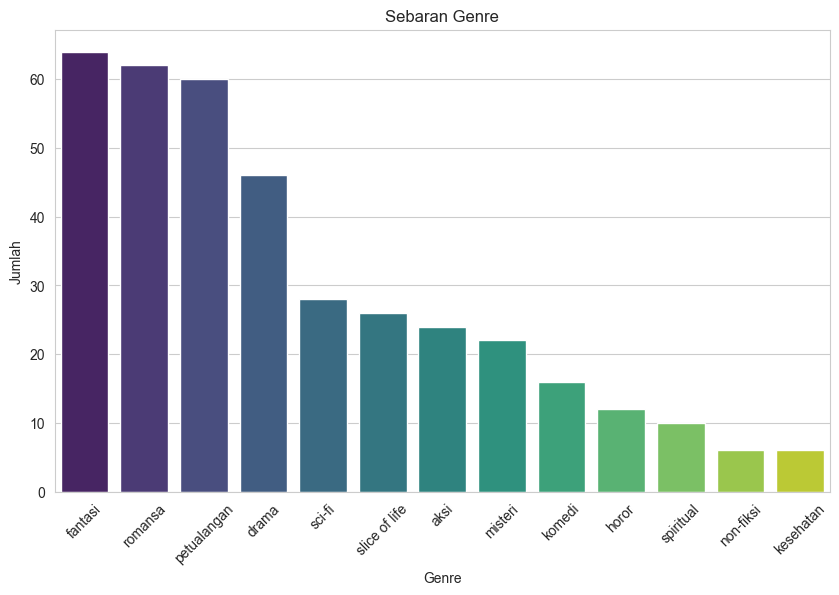

In [14]:
# hitung genre
genre_counts = split_fiction.filter(like='genres').stack().value_counts()

# bg style
sns.set_style("whitegrid")

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Sebaran Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

Note: Ada data typo (sudah diperbaiki)

5. visualisasi berdasarkan tag (top 10)

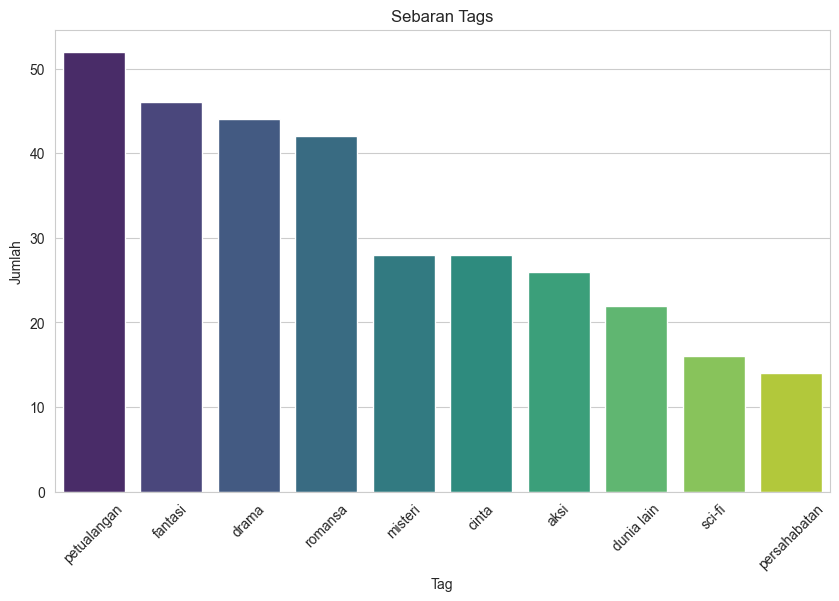

In [15]:
# hitung tag
tag_counts = split_fiction.filter(like='tag').stack().value_counts().head(10)

# bg style
sns.set_style("whitegrid")

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")
plt.title('Sebaran Tags')
plt.xlabel('Tag')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

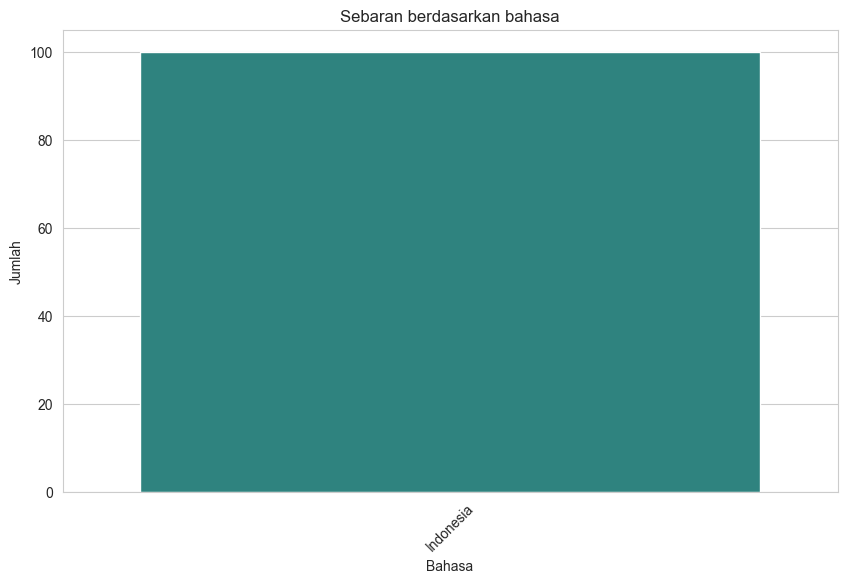

In [16]:
# hitung tag
lang_counts = split_fiction.groupby(split_fiction.language).size()

# bg style
sns.set_style("whitegrid")

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="viridis")
plt.title('Sebaran berdasarkan bahasa')
plt.xlabel('Bahasa')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

<h2>C. Analisa berdasarkan waktu rilis</h2>

1. Count / group by

In [17]:
# per tahun
# count
yearly_release_counts = split_fiction.groupby(split_fiction.release_date.dt.year).size()

#per bulan
# count
monthly_release_counts = split_fiction.groupby(split_fiction.release_date.dt.month).size()

# fill null with 0
monthly_release_counts = monthly_release_counts.reindex(range(1, 13), fill_value=0)

#per minggu
# count
weekly_release_counts = split_fiction.groupby(split_fiction.release_date.dt.day_of_week).size()

2. plot

Text(0, 0.5, 'Jumlah')

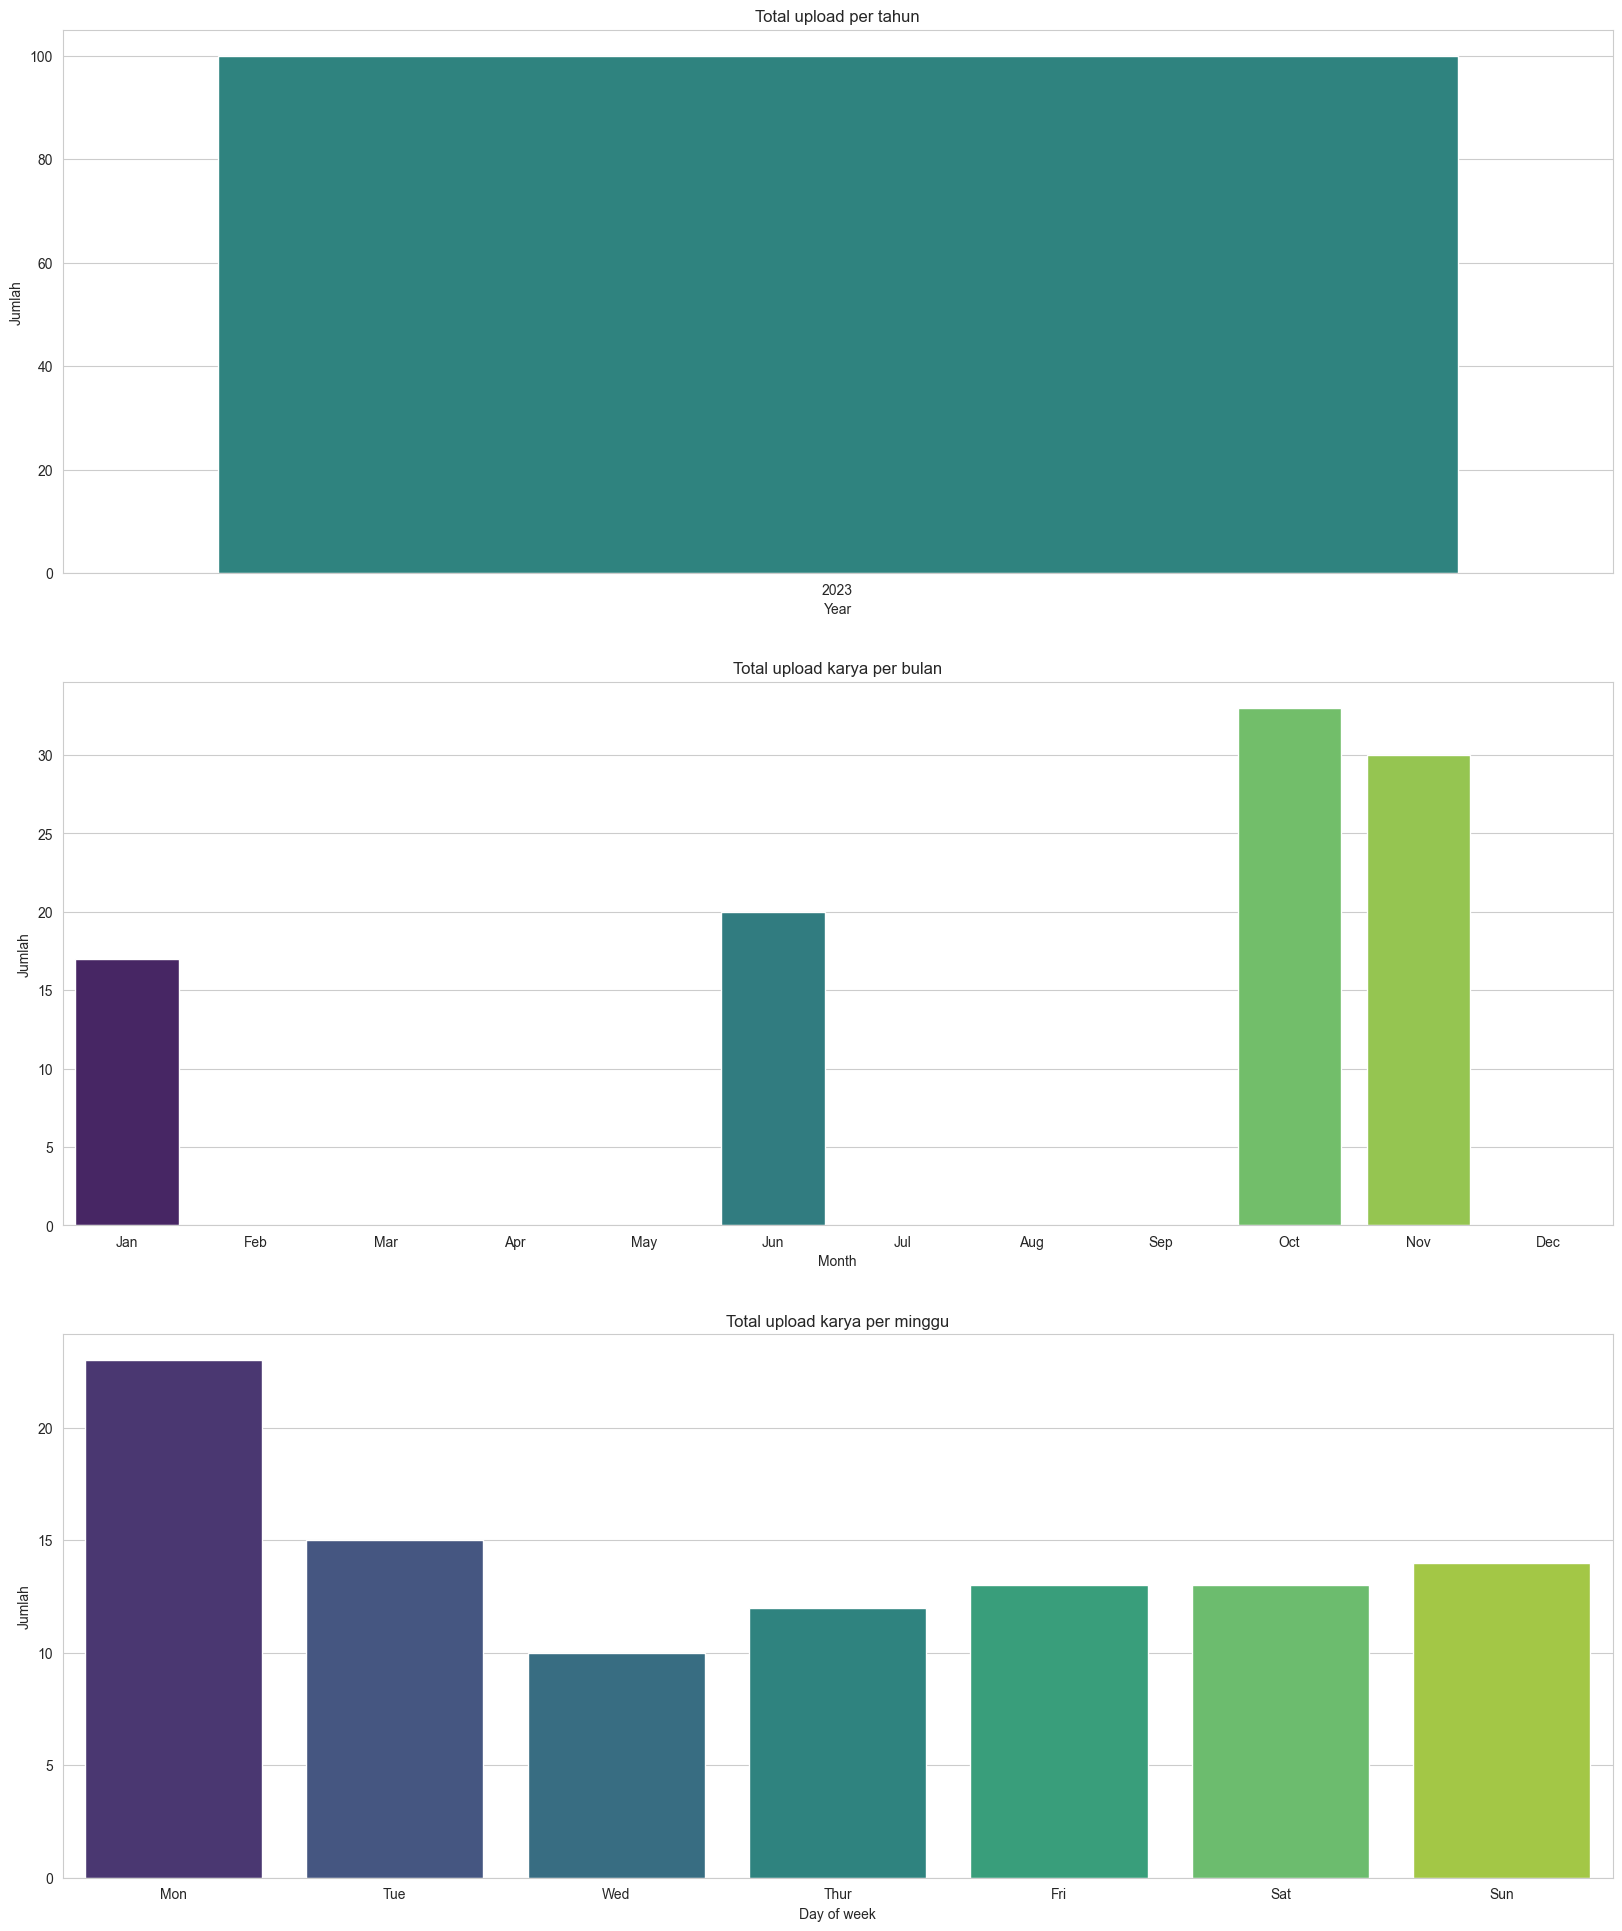

In [18]:
plt.figure(figsize=(20, 24))

# yearly
plt.subplot(3, 1, 1)
sns.barplot(x=yearly_release_counts.index, y=yearly_release_counts.values, palette="viridis")
plt.xlabel('Year')
plt.title('Total upload per tahun')
plt.ylabel('Jumlah')

# monthly
plt.subplot(3, 1, 2)
sns.barplot(x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], y=monthly_release_counts.values, palette="viridis")
plt.xlabel('Month')
plt.title('Total upload karya per bulan')
plt.ylabel('Jumlah')

# weekly
plt.subplot(3, 1, 3)
sns.barplot(x=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], y=weekly_release_counts.values, palette="viridis")
plt.xlabel('Day of week')
plt.title('Total upload karya per minggu')
plt.ylabel('Jumlah')

## User Data EDA

Q:  
1. by gender
2. by age

In [19]:
user_data = pd.read_csv('../dataset/user - data.csv')

In [20]:
user_data.head(3)

,user_id,first_name,last_name,gender,age,email
0,1,Izaak,Sheryn,Male,31,isheryn0@sitemeter.com
1,2,Lynna,Brunetti,Female,19,lbrunetti1@wikimedia.org
2,3,Hartley,Lafontaine,Male,21,hlafontaine2@europa.eu


1. count

In [21]:
# by gender
# count
user_counts_gender = user_data.groupby(user_data.gender).size()

# by age
# count
user_counts_age = user_data.groupby(user_data.age).size()

2. plot

Text(0, 0.5, 'Total')

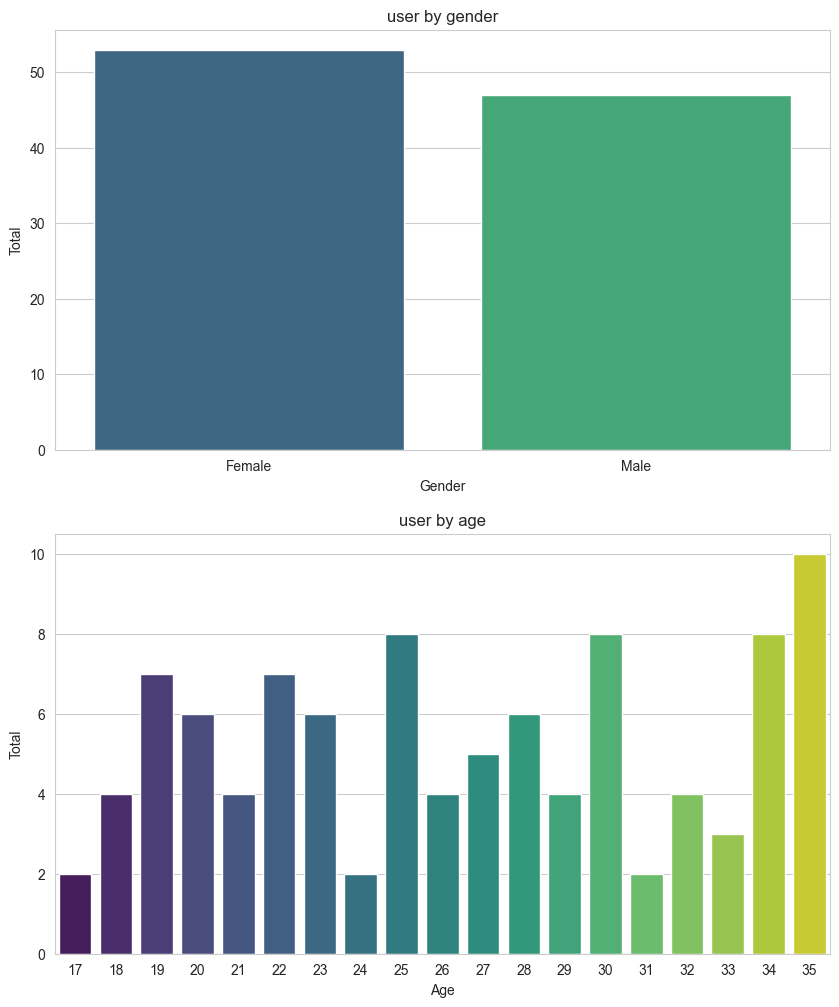

In [22]:
plt.figure(figsize=(10, 12))

# gender
plt.subplot(2, 1, 1)
sns.barplot(x=user_counts_gender.index, y=user_counts_gender.values, palette="viridis")
plt.xlabel('Gender')
plt.title('user by gender')
plt.ylabel('Total')

# age
plt.subplot(2, 1, 2)
sns.barplot(x=user_counts_age.index, y=user_counts_age.values, palette="viridis")
plt.xlabel('Age')
plt.title('user by age')
plt.ylabel('Total')

## Fiction, User, Rating Data EDA (merge)

<h3>Demographic Filtering (most popular, liked, rating, etc.)</h3>

<h4>A. Merger Data</h4>

In [23]:
fanfic_data = rating.merge(user_data, on="user_id").merge(split_fiction, on="fiction_id")

In [24]:
fanfic_data

,user_id,fiction_id,click,like,rating,first_name,last_name,gender,age,email,...,tags2,tags3,tags4,tags5,tags6,genres1,genres2,genres3,genres4,genres5
0,1,1,1,1,2,Izaak,Sheryn,Male,31,isheryn0@sitemeter.com,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None
1,3,1,1,1,1,Hartley,Lafontaine,Male,21,hlafontaine2@europa.eu,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None
2,4,1,1,1,1,Belva,Espley,Female,20,bespley3@phoca.cz,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None
3,5,1,1,1,1,Keary,Mayling,Male,23,kmayling4@gnu.org,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None
4,6,1,1,1,2,Genia,Straneo,Female,27,gstraneo5@123-reg.co.uk,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723,94,84,1,1,2,Tremaine,Winspeare,Male,30,twinspeare2l@usgs.gov,...,self-help,spiritual,wisata,None,None,spiritual,petualangan,None,None,None
6724,95,84,1,0,2,Keelby,O'Docherty,Male,21,kodocherty2m@upenn.edu,...,self-help,spiritual,wisata,None,None,spiritual,petualangan,None,None,None
6725,97,84,1,0,5,Lorrayne,Sainte Paul,Female,28,lsaintepaul2o@webs.com,...,self-help,spiritual,wisata,None,None,spiritual,petualangan,None,None,None
6726,98,84,1,1,1,Carlo,Caves,Male,22,ccaves2p@yale.edu,...,self-help,spiritual,wisata,None,None,spiritual,petualangan,None,None,None


In [25]:
fanfic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        6728 non-null   int64         
 1   fiction_id     6728 non-null   int64         
 2   click          6728 non-null   int64         
 3   like           6728 non-null   int64         
 4   rating         6728 non-null   int64         
 5   first_name     6728 non-null   object        
 6   last_name      6728 non-null   object        
 7   gender         6728 non-null   object        
 8   age            6728 non-null   int64         
 9   email          6728 non-null   object        
 10  title          6728 non-null   object        
 11  overview       6728 non-null   object        
 12  language       6728 non-null   object        
 13  release_date   6728 non-null   datetime64[ns]
 14  latest_update  6728 non-null   datetime64[ns]
 15  chapter        6728 n

Drop unecessary feature

In [26]:
deleted_feature = ['overview', 'language', 'latest_update', 'chapter']

fanfic_data = fanfic_data.drop(columns=deleted_feature)

fanfic_data.head(3)

,user_id,fiction_id,click,like,rating,first_name,last_name,gender,age,email,...,tags2,tags3,tags4,tags5,tags6,genres1,genres2,genres3,genres4,genres5
0,1,1,1,1,2,Izaak,Sheryn,Male,31,isheryn0@sitemeter.com,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None
1,3,1,1,1,1,Hartley,Lafontaine,Male,21,hlafontaine2@europa.eu,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None
2,4,1,1,1,1,Belva,Espley,Female,20,bespley3@phoca.cz,...,pembunuhan,misteri,cinta,romansa,None,romansa,misteri,None,None,None


1. concat first & last name -> full name
2. drop first_name & last_name

In [27]:
# concat
fanfic_data['full_name'] = fanfic_data['first_name'].str.cat(fanfic_data['last_name'], sep=' ')

# drop column
fanfic_data = fanfic_data.drop(columns=['first_name', 'last_name'])

#show
fanfic_data.head(3)

,user_id,fiction_id,click,like,rating,gender,age,email,title,release_date,...,tags3,tags4,tags5,tags6,genres1,genres2,genres3,genres4,genres5,full_name
0,1,1,1,1,2,Male,31,isheryn0@sitemeter.com,Kejahatan Cinta,2023-10-01,...,misteri,cinta,romansa,None,romansa,misteri,None,None,None,Izaak Sheryn
1,3,1,1,1,1,Male,21,hlafontaine2@europa.eu,Kejahatan Cinta,2023-10-01,...,misteri,cinta,romansa,None,romansa,misteri,None,None,None,Hartley Lafontaine
2,4,1,1,1,1,Female,20,bespley3@phoca.cz,Kejahatan Cinta,2023-10-01,...,misteri,cinta,romansa,None,romansa,misteri,None,None,None,Belva Espley


<h4>B. Demographic Filtering - User data</h4>

1. count

In [28]:
# most active user (click)
user_click_counts = fanfic_data.groupby('full_name')['click'].sum().sort_values(ascending=False).head(10)

# most active user (like)
user_like_counts = fanfic_data.groupby('full_name')['like'].sum().sort_values(ascending=False).head(10)

2. plot

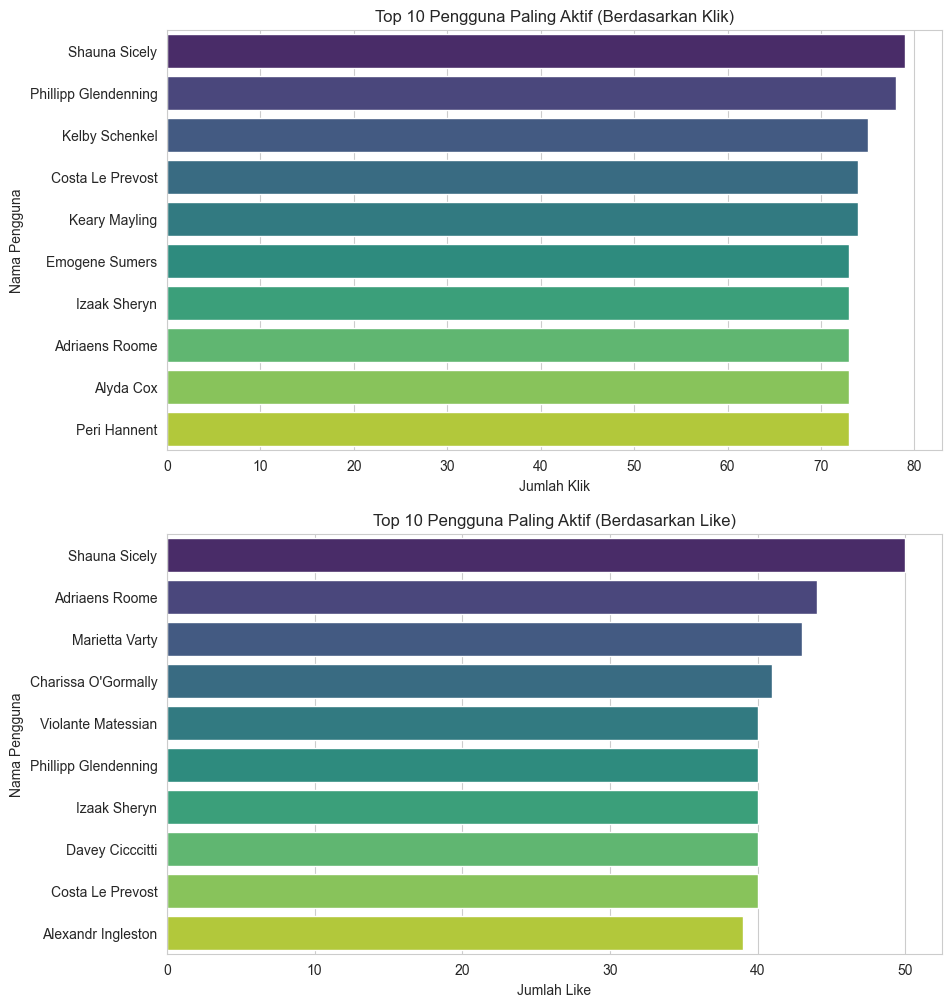

In [29]:
plt.figure(figsize=(10, 12))

# Click
plt.subplot(2, 1, 1)
sns.barplot(x=user_click_counts.values, y=user_click_counts.index, palette="viridis", orient='h')
plt.title('Top 10 Pengguna Paling Aktif (Berdasarkan Klik)')
plt.xlabel('Jumlah Klik')
plt.ylabel('Nama Pengguna')

# Like
plt.subplot(2, 1, 2)
sns.barplot(x=user_like_counts.values, y=user_like_counts.index, palette="viridis", orient='h')
plt.title('Top 10 Pengguna Paling Aktif (Berdasarkan Like)')
plt.xlabel('Jumlah Like')
plt.ylabel('Nama Pengguna')

plt.show()

<h4>B. Demographic Filtering - Fanfiction data</h4>

Note: 
Penting, sebagai acuan untuk demographic filtering 

Digunakan pada fitur most popular content

1. count

In [30]:
# most pupular fanfiction (click)
most_popular_fanfiction = fanfic_data.groupby('title')['click'].sum().sort_values(ascending=False).head(10)

# most liked fanfiction (like)
most_liked_fanfiction = fanfic_data.groupby('title')['like'].sum().sort_values(ascending=False).head(10)

# fanfiction with highest average rating 
highest_avg_rating = fanfic_data[fanfic_data['rating'] > 3].groupby('title').size().head(10).sort_values(ascending=False)

2. plot

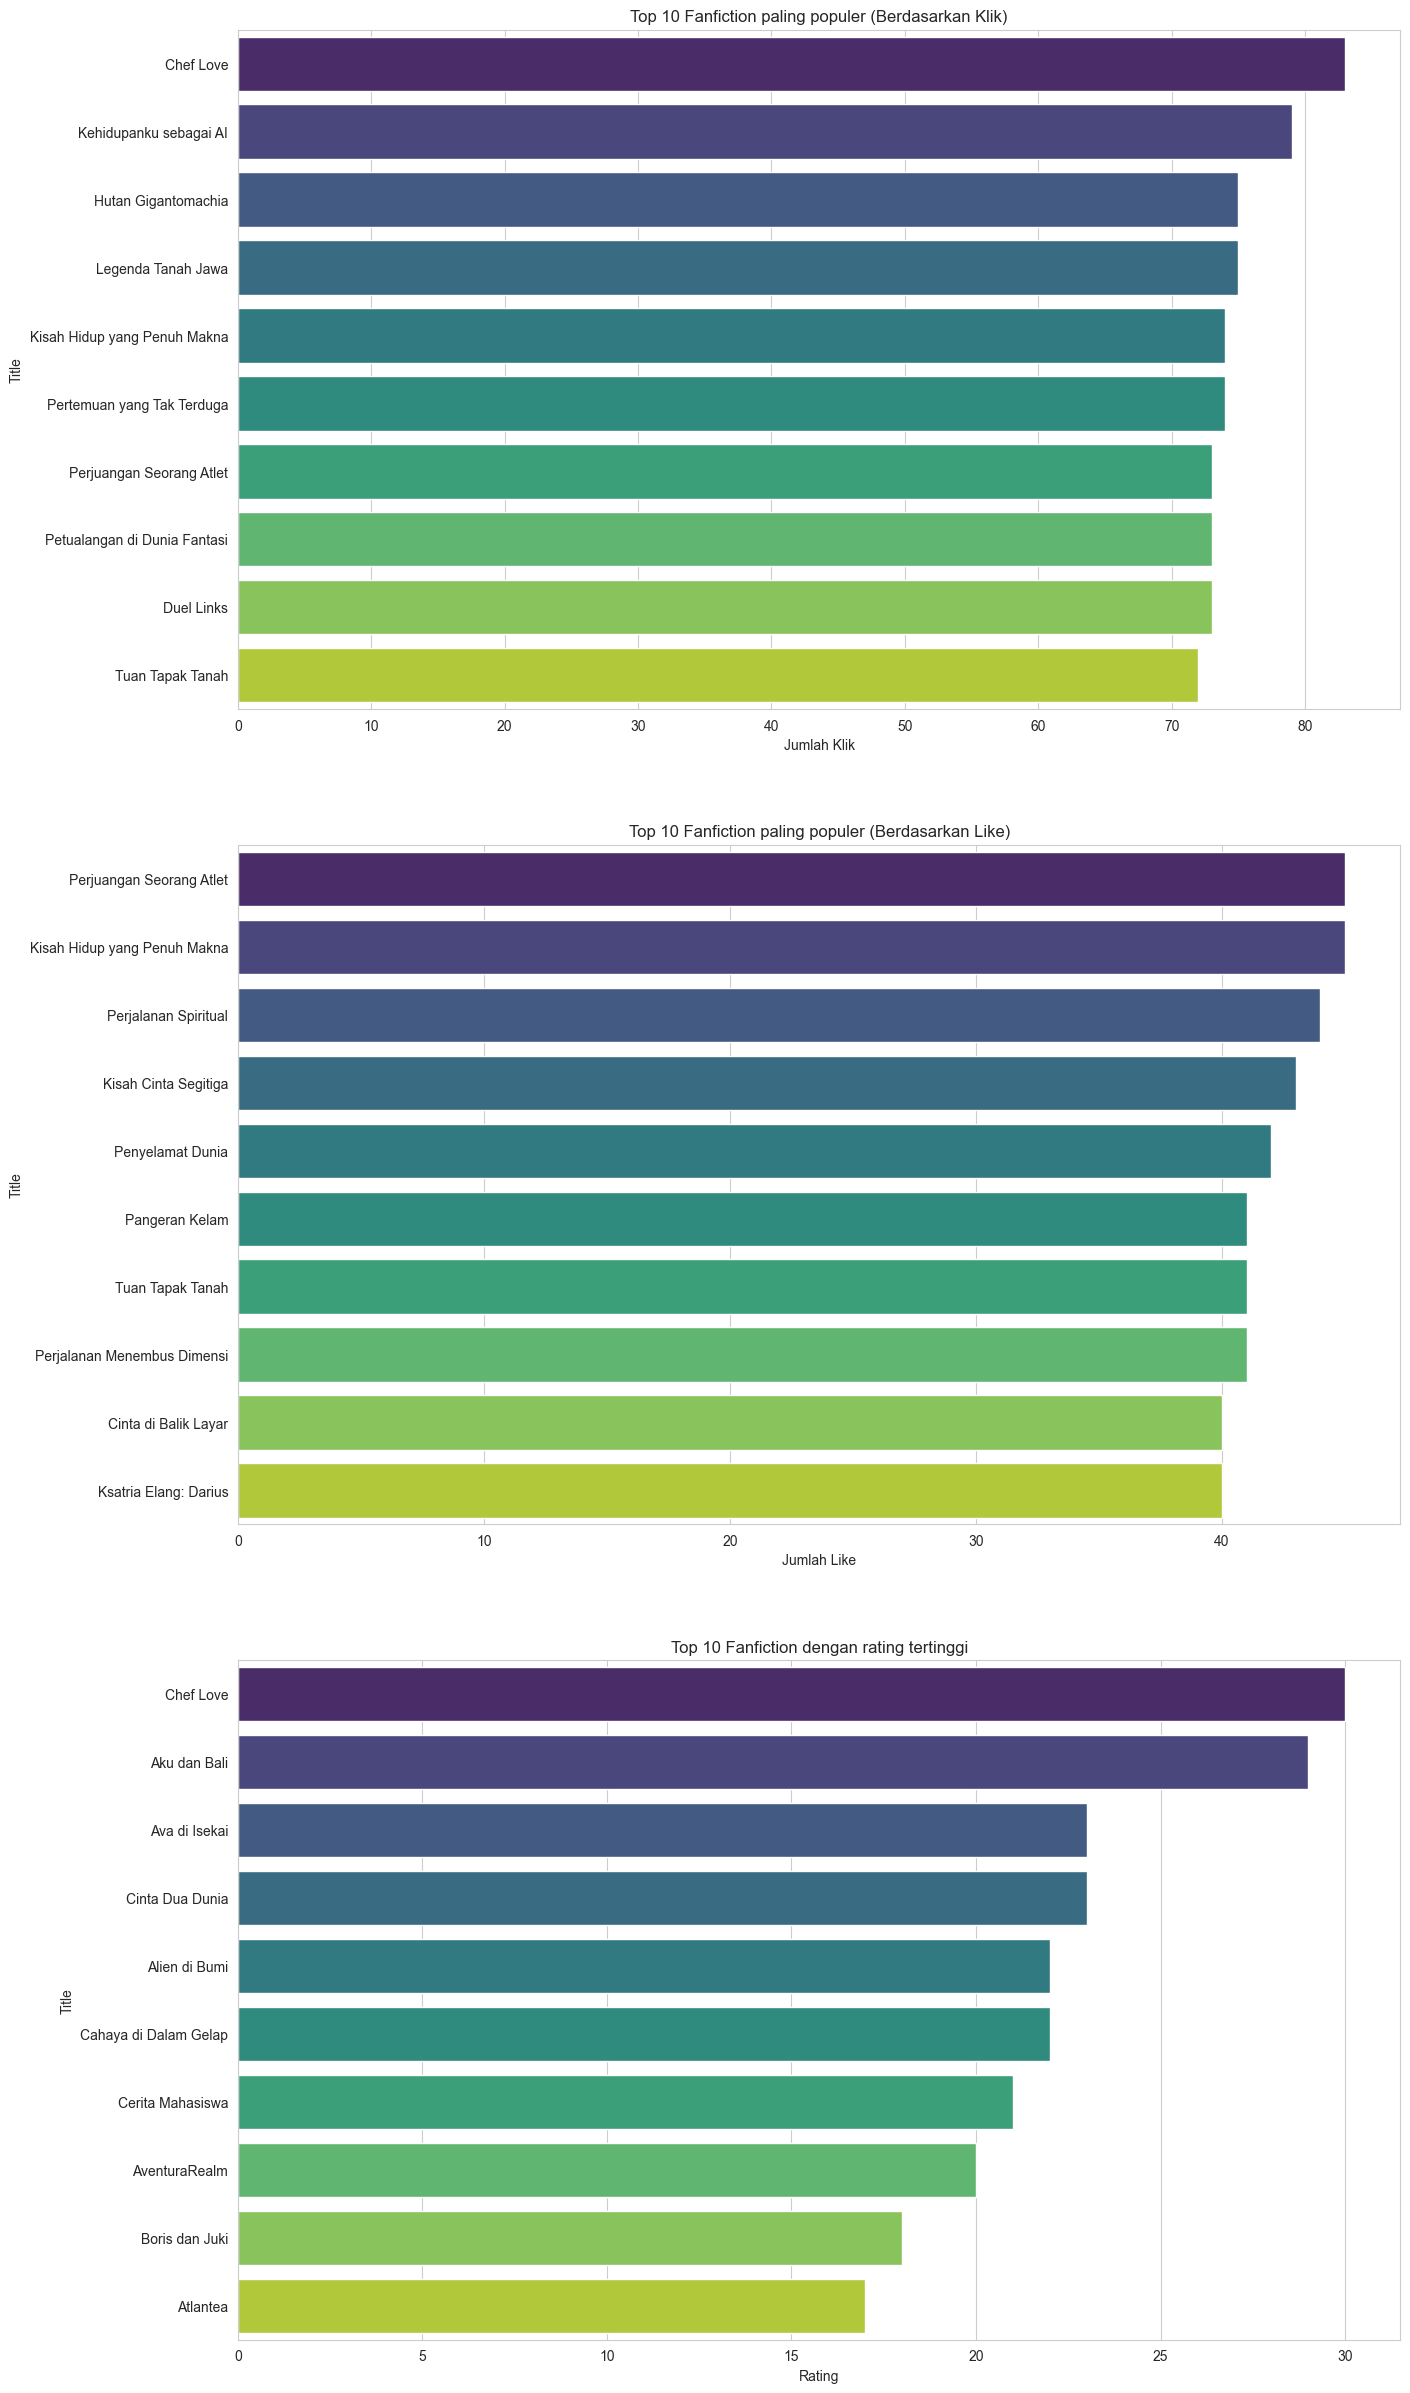

In [31]:
plt.figure(figsize=(15, 30))

# most popular fanfiction
plt.subplot(3, 1, 1)
sns.barplot(x=most_popular_fanfiction.values, y=most_popular_fanfiction.index, palette="viridis", orient='h')
plt.title('Top 10 Fanfiction paling populer (Berdasarkan Klik)')
plt.xlabel('Jumlah Klik')
plt.ylabel('Title')

# most liked fanfiction
plt.subplot(3, 1, 2)
sns.barplot(x=most_liked_fanfiction.values, y=most_liked_fanfiction.index, palette="viridis", orient='h')
plt.title('Top 10 Fanfiction paling populer (Berdasarkan Like)')
plt.xlabel('Jumlah Like')
plt.ylabel('Title')

# highest average rating
plt.subplot(3, 1, 3)
sns.barplot(x=highest_avg_rating.values, y=highest_avg_rating.index, palette="viridis", orient='h')
plt.title('Top 10 Fanfiction dengan rating tertinggi')
plt.xlabel('Rating')
plt.ylabel('Title')

plt.show()

Note: 
Penting, sebagai acuan untuk solusi mengatasi cold start pada sistem rekomendasi

Digunakan pada fitur 'For You' konten

In [32]:
# Get titles with most clicks
most_clicked_titles = fanfic_data.groupby('title')['click'].sum().nlargest(5)

# Get titles with most likes
most_liked_titles = fanfic_data.groupby('title')['like'].sum().nlargest(10)

# Get titles with count of ratings > 3
ratings_gt_3_titles = fanfic_data[fanfic_data['rating'] > 3].groupby('title').size().sort_values(ascending=False)

# Combine the data and prioritize based on ratings
combined_data = pd.concat([ratings_gt_3_titles, most_liked_titles, most_clicked_titles], axis=1)
combined_data.columns = ['Ratings > 3', 'Most Liked', 'Most Clicked']
combined_data = combined_data.fillna(0)
combined_data['Total'] = combined_data.sum(axis=1)
combined_data = combined_data.sort_values(by='Total', ascending=False)
combined_data

,Ratings > 3,Most Liked,Most Clicked,Total
title,,,,
Kisah Hidup yang Penuh Makna,25,45.0,74.0,144.0
Chef Love,30,0.0,83.0,113.0
Kehidupanku sebagai AI,31,0.0,79.0,110.0
Legenda Tanah Jawa,29,0.0,75.0,104.0
Hutan Gigantomachia,19,0.0,75.0,94.0
...,...,...,...,...
Atlantea,17,0.0,0.0,17.0
Cinta di Balik Tirai,16,0.0,0.0,16.0
Jangan Kau Lagi,16,0.0,0.0,16.0


Filter by genre

In [37]:
def get_filtered_data(fanfic_data, combined_data, genre):

    # Combine the "Total" column with fanfic_data
    fanfic_recommendation = pd.merge(fanfic_data, combined_data[['Total']], on='title', how='left')

    # Remove duplicates based on 'fiction_id'
    fanfic_recommendation = fanfic_recommendation.drop_duplicates(subset=['fiction_id'])

    # Filter and sort by genre and Total
    filtered_data = fanfic_recommendation[fanfic_recommendation.filter(like='genre').apply(lambda x: genre in x.values, axis=1)].sort_values(by='Total', ascending=False)

    # Return the filtered data with selected columns
    return filtered_data[['fiction_id', 'title', 'Total']]


In [42]:
get_filtered_data(fanfic_data, combined_data, 'drama').head(10)

,fiction_id,title,Total
1276,20,Kisah Hidup yang Penuh Makna,144.0
4439,81,Chef Love,113.0
2175,33,Perjuangan Seorang Atlet,73.0
2514,38,Kisah Cinta Segitiga,70.0
2310,35,Cinta di Balik Layar,66.0
5745,60,Cinta Terlarang,29.0
409,7,Reinkarnasi,27.0
610,10,Kisah Cinta yang Tak Terlupakan,26.0
1908,29,Pengembaraan di Masa Lalu,26.0
947,15,Keajaiban Cinta,24.0
